## Experiment Improved

This experiment attempts to maximize the effectiveness my looking at student answers and writing regular expressions based on the most oft-ocurring n-grams.

In [1]:
from importlib import reload
import re
import sys
sys.path.append('../')
import libs.stats as stats
import libs.utils as utils
import numpy as np
import pandas as pd
import asag_regex as asag_re
import json
reload(asag_re)

<module 'asag_regex' from '/home/che/Work/research/masters_project/automatic_question_answering/research/notebooks/research_full/paper/01_regex_experiments/asag_regex.py'>

In [2]:
# import the data
df = asag_re.read_df('../datasets/asag_v1_en.csv')
display(df.head(3))

AID  QID                                   Prompt  \
0    1    1  What does a function signature include?   
1    1    1  What does a function signature include?   
2    1    1  What does a function signature include?   

                                        Model Answer  Score  SID  \
0  The name of the function and the types of the ...    4.5    6   
1  The name of the function and the types of the ...    3.0    5   
2  The name of the function and the types of the ...    5.0    8   

                                      Student Answer  
0  It includes the name of the program, the type ...  
1  it includes the specific information about the...  
2  The function signature includes the name of th...

In [3]:

# import the user annotated dataset
df_p1 = asag_re.read_df('./results/asag_regex_p1_john_improved.csv')
print('Size: {}'.format(len(df_p1)))

Size: 21


In [685]:
idx = 20
print(df_p1.iloc[idx]['Model Answer'])
df_p1.iloc[idx]['Prompt']

The block inside a do...while statement will execute at least once.


'What is the main difference between a while and a do...while statement?'

In [4]:
#q = df[df['Prompt'] == 'What is the main difference between a while and a do...while statement?']
result = asag_re.evaluate_regex(df, df_p1)
#k = range(0,29)
#print(result['y_true'][k])
#print(result['y_pred'][k])

In [701]:
q.iloc[19]['Student Answer']

'A while loop terminates at the beginning of the loop, a do/while terminates at the end of the loop.'

In [702]:
fc, pc = asag_re.get_regex_from_table(df_p1, 3, 7)
asag_re.analyze(q.iloc[19]['Student Answer'].lower(), fc, pc)

(0.0, [])

Accuracy: 39.68%
Precision: 43.21%
Recall: 39.68%
F1-Measure: 36.78%
Pearson's R: 0.62
Cohen's Kappa: 0.19
RMSE: 1.93
Y-True Mean: 4.03
Y-Pred Mean: 2.99
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 2.07


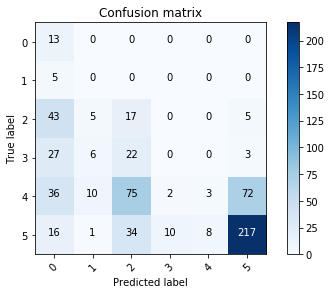

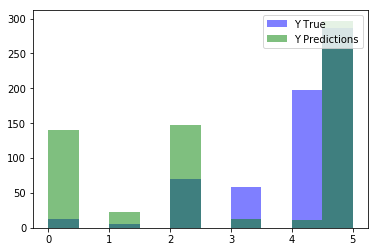

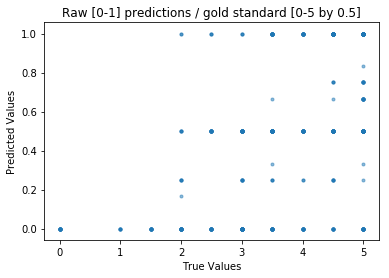

Avg. Difference: 1.340
Std.Deviation of Difference: 1.384


In [707]:
sm.print_big4(result['y_true'], result['y_pred'])
sm.print_stats(result['y_true'], result['y_pred'])
sm.plot_confusion_matrix(sm.cm(result['y_true'], result['y_pred']), np.arange(6))
sm.plot_histogram_comparison(result['y_true'], result['y_pred'], bins=10)
sm.plot_scatter(result['y_raw_true'], result['y_raw_pred'])
sm.diff_stats(result['y_true'], result['y_pred'])

Accuracy: 63.17%
Precision: 88.43%
Recall: 63.17%
F1-Measure: 68.70%
Pearson's R: 0.36
Cohen's Kappa: 0.25
RMSE: 0.61
Y-True Mean: 0.86
Y-Pred Mean: 0.51
Y-True Std Deviation: 0.35
Y-Pred Std Deviation: 0.50


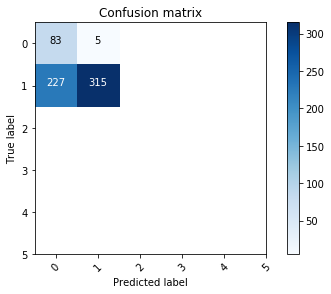

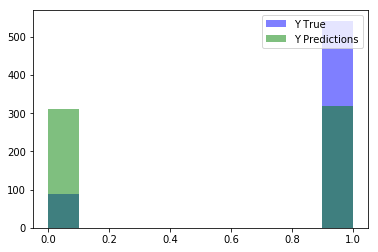

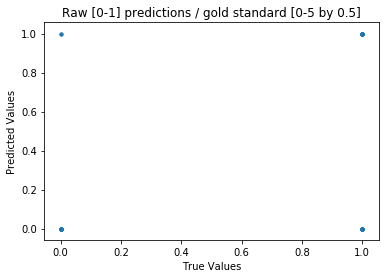

Avg. Difference: 0.368
Std.Deviation of Difference: 0.482


In [708]:
# Pass / Fail Results
y_true = result['y_true'].copy()
y_pred = result['y_pred'].copy()

y_true[y_true <= 2] = 0
y_true[y_true > 2] = 1

y_pred[y_pred <= 2] = 0
y_pred[y_pred > 2] = 1

sm.print_big4(y_true, y_pred)
sm.print_stats(y_true, y_pred)
sm.plot_confusion_matrix(sm.cm(y_true, y_pred), np.arange(6))
sm.plot_histogram_comparison(y_true, y_pred, bins=10)
sm.plot_scatter(y_true, y_pred)
sm.diff_stats(y_true, y_pred)

Accuracy: 63.175%
Precision: 88.427%
Recall: 63.175%
F1-Measure: 68.703%
Pearson's R: 0.36
Cohen's Kappa: 0.25
RMSE: 0.61
MAE: 0.37
Y-True Mean: 0.86
Y-Pred Mean: 0.51
Y-True Std Deviation: 0.35
Y-Pred Std Deviation: 0.50


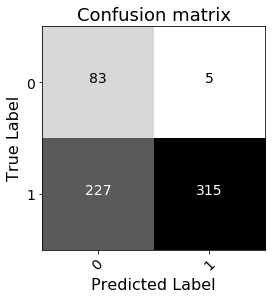

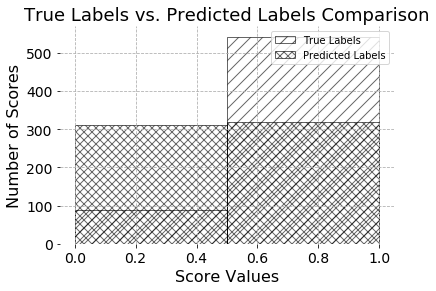

In [5]:
reload(stats)
y_true_pf = utils.convert_to_pass_fail(result['y_true'])
y_pred_pf = utils.convert_to_pass_fail(result['y_pred'])

stats.print_big4(y_true_pf, y_pred_pf)
stats.print_stats(y_true_pf, y_pred_pf)
stats.plot_confusion_matrix(stats.cm(y_true_pf, y_pred_pf), np.arange(2), savefile='./renderings/exp4/e4_pf')
stats.plot_histogram_comparison(y_true_pf, y_pred_pf, bins=2, savefile='./renderings/exp4/e4_pf')